In [3]:
pip install qiskit

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install qiskit_aer

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for qiskit_aer from https://files.pythonhosted.org/packages/a3/4a/f40f4655010b104e4e98a89f13e960fb6f02f2b2ceb6ecf73762bce86d22/qiskit_aer-0.15.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.5 MB 751.6 kB/s eta 0:00:13
   - -------------------------------------- 0.4/9.5 MB 2.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.5 MB 6.6 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.5 MB 17.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.7/9.5 MB 19.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.0/9.5 MB 24.4 MB/s eta 0:00:01
   ---------------------------

Target values used: [5996, 8432, 4682, 941, 9448, 1977, 2609, 9615, 4754, 282]
Binary Search Average Runtime: 0.000000 seconds
Grover's Algorithm Average Runtime: 0.922180 seconds


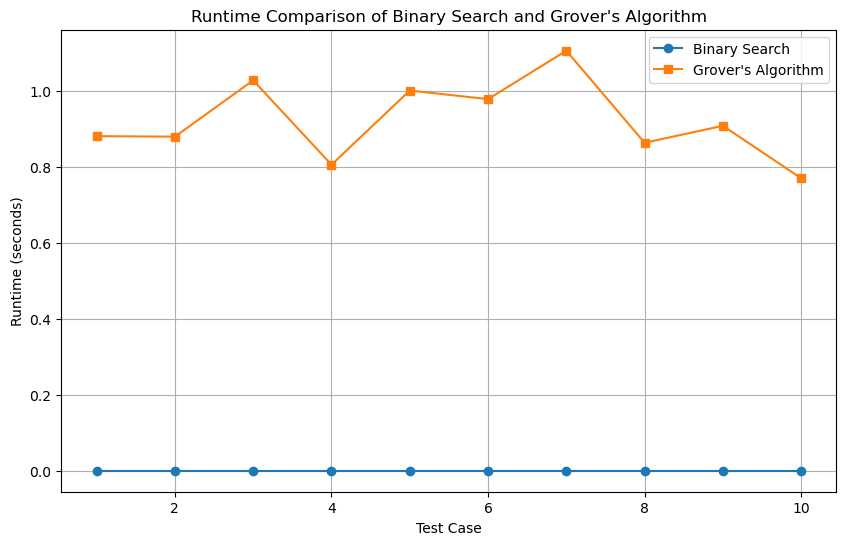

In [4]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCXGate

# Function to run Binary Search
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    start_time = time.time()
    
    while left <= right:
        mid = left + (right - left) // 2
        if arr[mid] == target:
            end_time = time.time()
            return end_time - start_time
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    
    end_time = time.time()
    return end_time - start_time  # Target not found

# Function to run Grover's Algorithm
def grover_search(random_dataset, target):
    n_qubits = int(np.ceil(np.log2(len(random_dataset))))
    oracle_index = random_dataset.index(target)
    oracle_binary = f"{oracle_index:0{n_qubits}b}"

    # Define Oracle
    oracle = QuantumCircuit(n_qubits)
    for i, bit in enumerate(oracle_binary):
        if bit == '0':
            oracle.x(i)
    oracle.cz(0, n_qubits - 1)
    for i, bit in enumerate(oracle_binary):
        if bit == '0':
            oracle.x(i)

    # Define Grover diffusion operator
    diffusion = QuantumCircuit(n_qubits)
    diffusion.h(range(n_qubits))
    diffusion.x(range(n_qubits))
    diffusion.h(n_qubits - 1)
    diffusion.append(MCXGate(n_qubits - 1), list(range(n_qubits - 1)) + [n_qubits - 1])
    diffusion.h(n_qubits - 1)
    diffusion.x(range(n_qubits))
    diffusion.h(range(n_qubits))

    # Combine Oracle and Diffusion into Grover Circuit
    grover_circuit = QuantumCircuit(n_qubits, n_qubits)
    grover_circuit.h(range(n_qubits))
    grover_iterations = int(np.sqrt(len(random_dataset)))

    for _ in range(grover_iterations):
        grover_circuit.append(oracle, range(n_qubits))
        grover_circuit.append(diffusion, range(n_qubits))

    grover_circuit.measure(range(n_qubits), range(n_qubits))

    # Execute Grover's algorithm
    simulator = AerSimulator()
    start_time = time.time()
    transpiled_circuit = transpile(grover_circuit, simulator)
    job = simulator.run(transpiled_circuit, shots=5000)
    end_time = time.time()

    return end_time - start_time

# Initialize variables
binary_runtimes = []
grover_runtimes = []
targets = []

# Run 10 test cases with random targets
for _ in range(10):
    # Generate dataset and target
    ordered_dataset = list(range(1, 10000))
    target = random.randint(1, 9999)
    targets.append(target)

    # Binary Search
    binary_runtimes.append(binary_search(ordered_dataset, target))

    # Grover's Algorithm
    random_dataset = ordered_dataset.copy()
    random.shuffle(random_dataset)
    if target not in random_dataset:
        random_dataset.append(target)
        random.shuffle(random_dataset)
    
    grover_runtimes.append(grover_search(random_dataset, target))

# Calculate average runtimes
binary_avg_runtime = np.mean(binary_runtimes)
grover_avg_runtime = np.mean(grover_runtimes)

# Print results
print(f"Target values used: {targets}")
print(f"Binary Search Average Runtime: {binary_avg_runtime:.6f} seconds")
print(f"Grover's Algorithm Average Runtime: {grover_avg_runtime:.6f} seconds")

# Plot the runtimes
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), binary_runtimes, label="Binary Search", marker='o')
plt.plot(range(1, 11), grover_runtimes, label="Grover's Algorithm", marker='s')
plt.xlabel("Test Case")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison of Binary Search and Grover's Algorithm")
plt.legend()
plt.grid(True)
plt.show()
